In [1]:
# Import libraries
import numpy as np
import pandas as pd

# Import statistical module
from scipy import stats

# Import custom modules
import acquire
import prepare
import explore

## Wrangle

In [2]:
# Acquire and prepare data returned as dataframe
df = acquire.get_data(query_url = False)
print(df.shape)
df = prepare.prepare_dataframe(df)
train, validate, test = prepare.split_data(df)
train.shape, validate.shape, test.shape

Found file in working directory!
(70932, 83)


((40311, 60), (20155, 60), (20156, 60))

## Q1: Is there a significant difference in usd between non-foil only cards and non-foil cards with foil versions?

## Key takeaway:
- Taking into account all sets the difference in favor of non-foil only cards is about $10.91

## Discussion:
- Found the null hypothesis to be false and the alternative hypothesis to be true. That there is a statistically significant difference between the prices of cards that are only non-foil and cards with both foil & non-foil versions.
- The difference isn't in the way I initially anticipated as foil cards are supposed to be the premium product and rarer in general, but the non-foil onlys were almost seven times more expensive.  I suspect that the cards that only come in non-foil are much older on average than those with both foil and non-foil versions.
- I set up the functions to account for any cards that come in foil but not in non-foil, however it appears that there non-foil versions of all cards but I'll leave it as is in case that changes in the future.
- There appear to be some large outliers for both non-foil only and both foil & non-foil sets.  The non-foil onlys have much higher outliers in USD but may be less extreme in relation to the rest of the non-foil onlys in comparison to the cards with both foil and non-foil versions.

## Visualization

Bar plot comparing cards that are only non-foils to those that have both foil & non-foil version.

/Users/ultimate/codeup-data-science/scratchbook_for_current_gp_proj/Jason/explore.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['nonfoil_only'] = (df.loc[:, 'nonfoil'] == True) & (df.loc[:, 'foil'] == False)
/Users/ultimate/codeup-data-science/scratchbook_for_current_gp_proj/Jason/explore.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['foil_and_nonfoil'] = df.loc[:, 'nonfoil'] == df.loc[:, 'foil']
/opt/homebrew/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1681: SettingWit

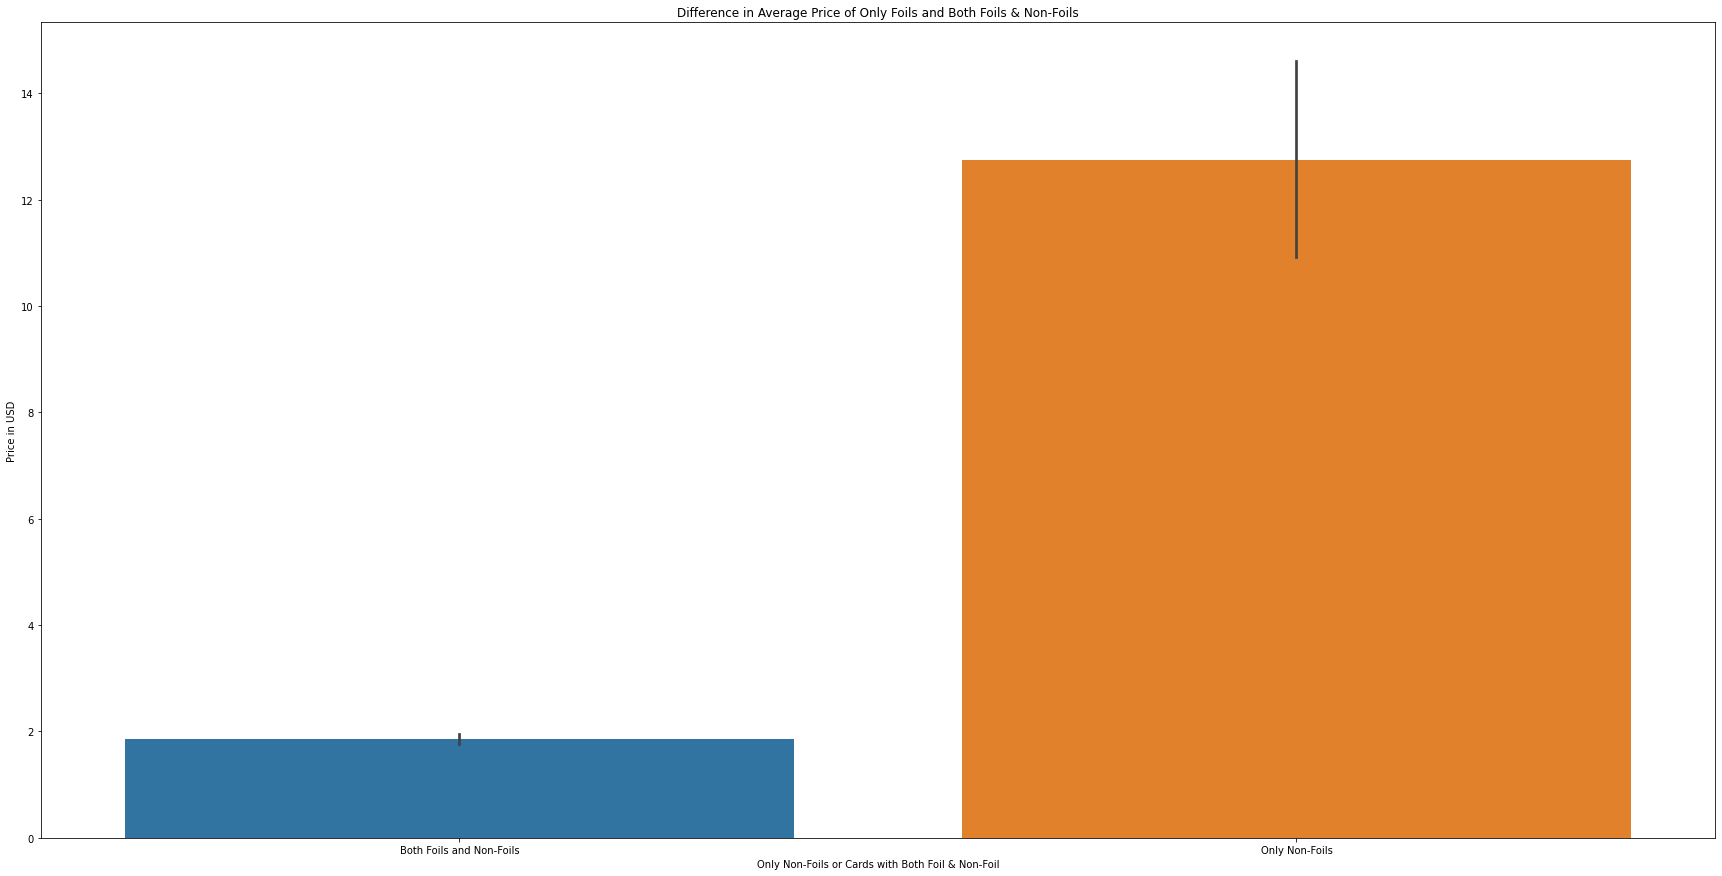

(None,
 'The average USD price of non-foil only cards is $12.76,  and for cards with both foil and non-foil is $1.85. The difference in average price is $10.91.')

In [3]:
# Creates a bar plot for columns in the dataframe for if it's non-foil only or not.
explore.nonfoil_only_or_not_viz(train)

## Hypothesis Testing
95% Significance Level: α = 0.05
- $H_0$ = There is not a signficant difference between foil & non-foil cards.
- $H_a$ = There is a significant difference between foil & non-foil cards.

In [4]:
# Hypothesis testing for question 1 using Two-sample T-Test with a 95% confidence interval.
explore.q1_hypothesis_test(train)

Variance for non-foil only cards is 15743.686.
Variance for cards with both foil and non-foil cards is 50.2.
The t-statistic is -11.302 less than 0, and the p-value of 8.201e-30 is statistically significant.
We reject the Null Hypothesis


## Q2: What’s the difference in card prices for reprints versus first printings?

## Key takeaway
- Reprinted cards cost about 77¢ more on average than first printings

## Discusion
- We fail to reject the null hypothesis that there is a statistically significant difference between the prices of reprints and first printings.
- Next I would try filtering out all the cards that don't have reprinted versions.
- There may be an issue with the reprints lowering the price of the first printings so that there's a less statistically significant difference.

## Visualization

/opt/homebrew/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1681: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = empty_value
/opt/homebrew/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


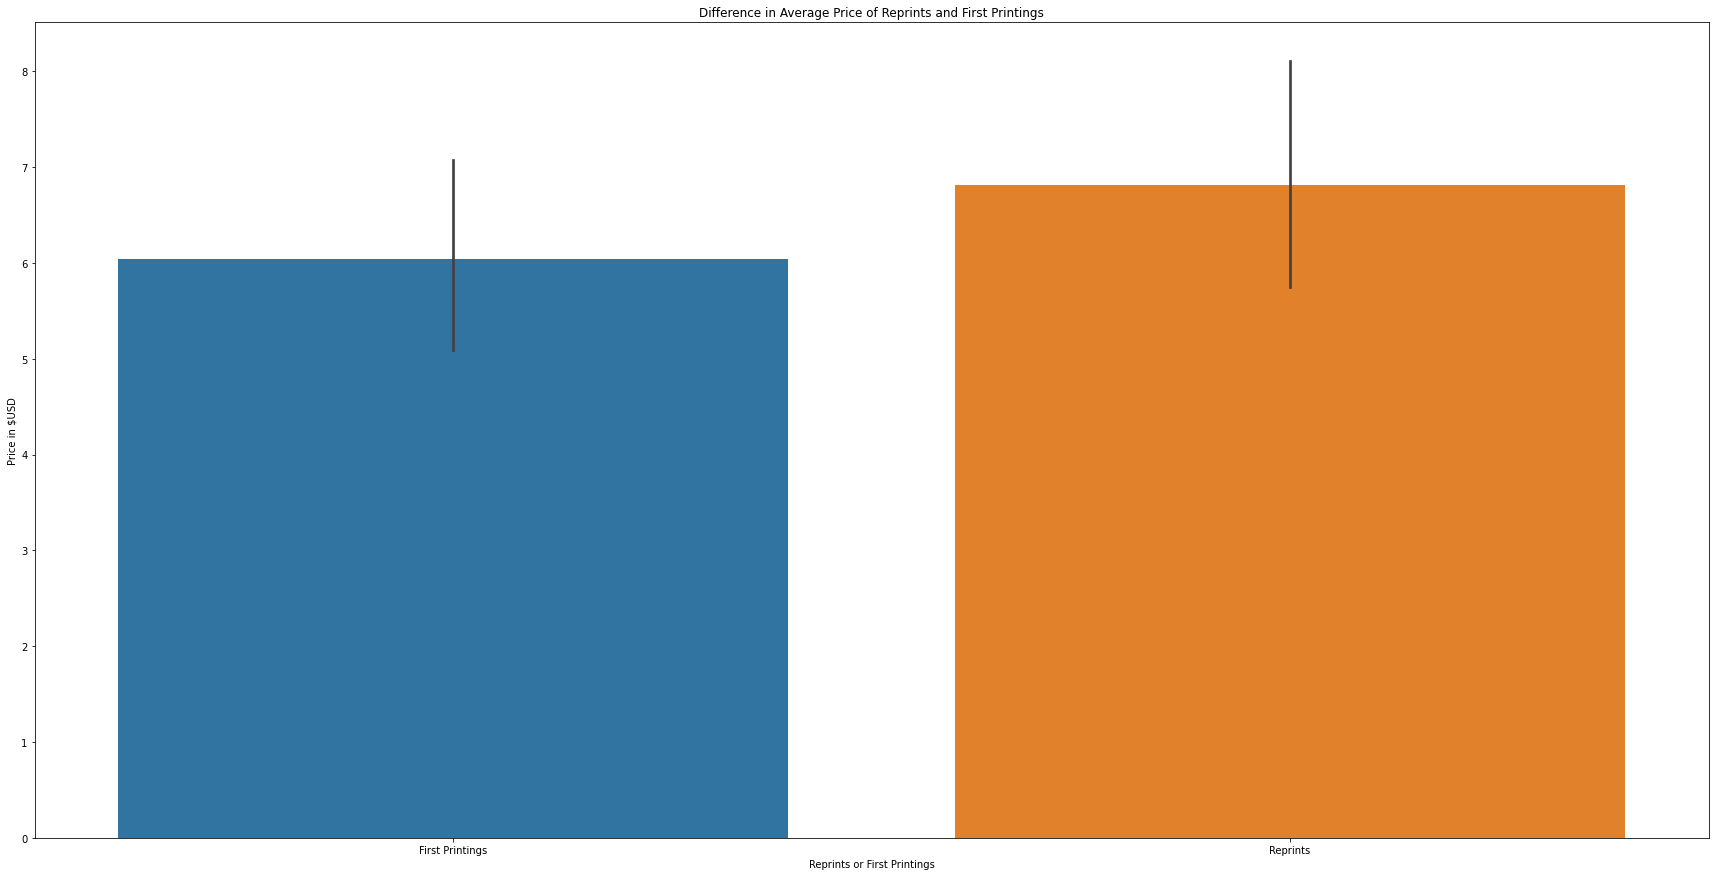

(None,
 'The average USD price of reprinted cards is $6.82,  and first print cards is $6.04. The difference in average price is $0.77.')

In [5]:
# Combines explore functions for question two visualization
explore.reprint_or_not_viz(train)

## Hypothesis Testing
Significance Level: α = 0.05
- $H_0$ = There is not a signficant difference in USD prices between reprints & first printings.
- $H_a$ = There is a significant difference in USD prices between reprints & first printings.

In [6]:
# Hypothesis testing for question 1 using Two-sample T-Test with a 95% confidence interval
explore.q2_hypothesis_test(train)

Variance for non-foil only cards is 7721.256.
Variance for cards with both foil and non-foil cards is 5609.148.
The t-statistic is -0.952 less than 0, but the p-value of 1.705e-01 is not statistically significant.
We fail to reject the Null Hypothesis


## Q3: How do cards with style treatments like frames or full art, affect their prices?

## Key takeaway
- 

## Discusion
- 
- 
- 

## Visualization

In [7]:
# # Combines explore functions for question two visualization
# explore.reprint_or_not_viz(train)

## Hypothesis Testing
Significance Level: α = 0.05
- $H_0$ = There is not a signficant difference in USD prices between regular & styled cards.
- $H_a$ = There is a significant difference in USD prices between regular & styled cards.

In [8]:
# # Hypothesis testing for question 1 using Two-sample T-Test with a 95% confidence interval
# explore.q2_hypothesis_test(train)